<div align="center">
  <b> <font size="6">Classification using Decision Tree - Using SK-Learn </font> </b>
</div> 

Given input features Company name, job title, and degree obtained, we should predict that employee receives salary over 100k or not.

In [44]:
# Import necessary package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

### Step 1: Load the dataset

In [45]:
df = pd.read_csv("E:\\MY LECTURES\\8.2021-09-03 DATA SCIENCE (KNU)\\3.Programs\\dataset\\salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


### Step 2: Apply EDA

In [46]:
df['company'].unique()

array(['google', 'abc pharma', 'facebook'], dtype=object)

In [47]:
df['job'].unique()

array(['sales executive', 'business manager', 'computer programmer'],
      dtype=object)

In [48]:
df['degree'].unique()

array(['bachelors', 'masters'], dtype=object)

In [49]:
df['salary_more_then_100k'].unique()

array([0, 1], dtype=int64)

### Step 3. Pre-process and extract the features

In [50]:
X = df.drop('salary_more_then_100k',axis='columns')
Y = df['salary_more_then_100k']

In [51]:
# Input feature set
X.head()

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors


In [52]:
# Output feature 
Y.head()

0    0
1    0
2    1
3    1
4    0
Name: salary_more_then_100k, dtype: int64

##### Label encoding

Converting categorical values to numerical values

In [53]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [54]:
X['company_n'] = le_company.fit_transform(X['company'])
X['job_n'] = le_job.fit_transform(X['job'])
X['degree_n'] = le_degree.fit_transform(X['degree'])

In [55]:
X.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [56]:
# Drop the label columns
pre_processed_X = X.drop(['company','job','degree'],axis='columns')
pre_processed_X.head()

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


### Step 4. Split the data for training and testing

In [57]:
# Splitting dataset into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(pre_processed_X, Y, test_size = 0.2, random_state = 0)

### Step 5. Training the model

In [58]:
from sklearn import tree
DT_model = tree.DecisionTreeClassifier()

In [59]:
DT_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [60]:
y_train_pred = DT_model.predict(x_train)
y_train_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

In [61]:
DT_Train_RS = DT_model.score(x_train, y_train)
DT_Train_RS

1.0

In [62]:
train_predicted_prob = DT_model.predict_proba(x_train)
train_predicted_prob

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

##### Performance score 

In [63]:
out = DT_model.score(x_train, y_train)
DT_Train_RS = np.round(out,2)*100
print("Performance score for training set :",DT_Train_RS,"%") 

Performance score for training set : 100.0 %


##### Confusion matrix

We are interested to know how many has been correctly and wrongly classified.

Text(19.5, 0.5, 'Truth')

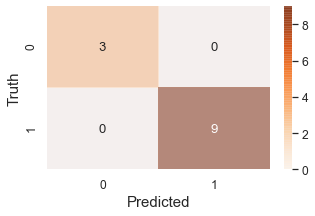

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train,y_train_pred)

plt.figure(figsize = (5,3))
sns.set(font_scale=1.1)

axes = plt.gca()
axes.xaxis.label.set_size(15)
axes.yaxis.label.set_size(15) 

sns.heatmap(cm, annot=True,cmap=plt.cm.Oranges, alpha=0.5)

plt.xlabel('Predicted')
plt.ylabel('Truth')

##### Precison, Recall, F1, Accuracy

In [65]:
# Total report
from sklearn import metrics
print(metrics.classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         9

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [66]:
# Accuracy score
temp = metrics.accuracy_score(y_train,y_train_pred)
DT_Train_Accuracy = np.round(temp,2)*100
print("Accuracy score : ",DT_Train_Accuracy,"%")

Accuracy score :  100.0 %


In [67]:
# Precision score
temp = metrics.precision_score(y_train,y_train_pred)
DT_Train_Precision = np.round(temp,2)*100
print("Precision score : ",DT_Train_Precision,"%")

Precision score :  100.0 %


In [68]:
# Recall score
temp = metrics.recall_score(y_train,y_train_pred)
DT_Train_Recall = np.round(temp,2)*100
print("Recall score : ",DT_Train_Recall,"%")

Recall score :  100.0 %


In [69]:
# F1 score
temp = metrics.f1_score(y_train,y_train_pred)
DT_Train_F1 = np.round(temp,2)*100
print("F1 score : ",DT_Train_F1,"%")

F1 score :  100.0 %


In [70]:
# Cohen Kappa score
temp = metrics.cohen_kappa_score(y_train,y_train_pred)
DT_Train_CK = np.round(temp,2)*100
print("Cohen Kappa score : ",DT_Train_CK,"%")

Cohen Kappa score :  100.0 %


##### ROC 

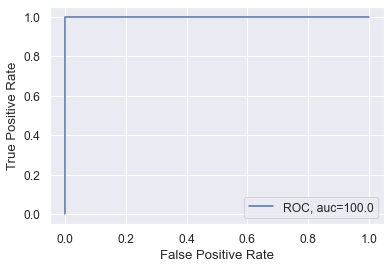

In [71]:
prob = train_predicted_prob[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train, prob)
DT_Train_AUC = np.round(metrics.roc_auc_score(y_train, prob),2)*100
plt.plot(fpr,tpr,label="ROC, auc="+str(DT_Train_AUC))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

### Step 6. Testing the model

In [72]:
y_test_pred = DT_model.predict(x_test)
y_test_pred

array([1, 0, 0, 0], dtype=int64)

In [73]:
test_predicted_prob = DT_model.predict_proba(x_test)
test_predicted_prob

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

##### Performance score 

In [74]:
out = DT_model.score(x_test, y_test)
DT_Test_RS = np.round(out,2)*100
print("Performance score for training set :",DT_Test_RS,"%") 

Performance score for training set : 50.0 %


##### Confusion matrix

We are interested to know how many has been correctly and wrongly classified.

Text(19.5, 0.5, 'Truth')

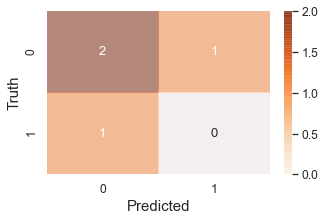

In [75]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_test_pred)

plt.figure(figsize = (5,3))
sns.set(font_scale=1.1)

axes = plt.gca()
axes.xaxis.label.set_size(15)
axes.yaxis.label.set_size(15) 

sns.heatmap(cm, annot=True,cmap=plt.cm.Oranges, alpha=0.5)

plt.xlabel('Predicted')
plt.ylabel('Truth')

##### Precison, Recall, F1, Accuracy

In [76]:
# Total report
from sklearn import metrics
print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.00      0.00      0.00         1

    accuracy                           0.50         4
   macro avg       0.33      0.33      0.33         4
weighted avg       0.50      0.50      0.50         4



In [77]:
# Accuracy score
temp = metrics.accuracy_score(y_test,y_test_pred)
DT_Test_Accuracy = np.round(temp,2)*100
print("Accuracy score : ",DT_Test_Accuracy,"%")

Accuracy score :  50.0 %


In [78]:
# Precision score
temp = metrics.precision_score(y_test,y_test_pred)
DT_Test_Precision = np.round(temp,2)*100
print("Precision score : ",DT_Test_Precision,"%")

Precision score :  0.0 %


In [79]:
# Recall score
temp = metrics.recall_score(y_test,y_test_pred)
DT_Test_Recall = np.round(temp,2)*100
print("Recall score : ",DT_Test_Recall,"%")

Recall score :  0.0 %


In [80]:
# F1 score
temp = metrics.f1_score(y_test,y_test_pred)
DT_Test_F1 = np.round(temp,2)*100
print("F1 score : ",DT_Test_F1,"%")

F1 score :  0.0 %


In [81]:
# Cohen Kappa score
temp = metrics.cohen_kappa_score(y_test,y_test_pred)
DT_Test_CK = np.round(temp,2)*100
print("Cohen Kappa score : ",DT_Test_CK,"%")

Cohen Kappa score :  -33.0 %


##### ROC 

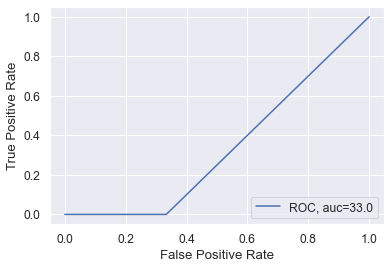

In [82]:
prob = test_predicted_prob[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, prob)
DT_Test_AUC = np.round(metrics.roc_auc_score(y_test, prob),2)*100
plt.plot(fpr,tpr,label="ROC, auc="+str(DT_Test_AUC))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

### Step 7. Prediction using the model 

Is salary of Google, Computer Engineer, Bachelors degree > 100 k ?

In [83]:
DT_model.predict([[2,1,0]])

array([0], dtype=int64)

Is salary of Google, Computer Engineer, Masters degree > 100 k ?

In [84]:
DT_model.predict([[2,1,1]])

array([1], dtype=int64)

### Step 8. Summary

In [85]:
print("             Decision Tree      ")
print("====================================================")
print("\t\tTraining phase       Testing phase ")
print("====================================================")
print("RS\t\t   ",DT_Train_RS,"%\t\t", DT_Test_RS,"%") 
print("Accuracy\t   ",DT_Train_Accuracy,"%\t\t", DT_Test_Accuracy,"%") 
print("Precision\t   ",DT_Train_Precision,"%\t\t", DT_Test_Precision,"%") 
print("Recall\t\t   ",DT_Train_Recall,"%\t\t", DT_Test_Recall,"%") 
print("F1\t\t   ",DT_Train_F1,"%\t\t", DT_Test_F1,"%") 
print("CK\t\t   ",DT_Train_CK,"%\t\t", DT_Test_CK,"%") 
print("AUC\t\t   ",DT_Train_AUC,"%\t\t", DT_Test_AUC,"%") 
print("====================================================")

             Decision Tree      
		Training phase       Testing phase 
RS		    100.0 %		 50.0 %
Accuracy	    100.0 %		 50.0 %
Precision	    100.0 %		 0.0 %
Recall		    100.0 %		 0.0 %
F1		    100.0 %		 0.0 %
CK		    100.0 %		 -33.0 %
AUC		    100.0 %		 33.0 %


### Exercise  

Build decision tree model to predict the survival of a passanger in Titanic datast. <br>
CSV file is available here https://github.com/codebasics/py/blob/master/ML/9_decision_tree/Exercise/titanic.csv  <br>
<br>
Input features: Pclass, Sex, Age, Fare  <br>
Output feature: Survived  <br>
<br>
Calculate score of your model. <br>
<br>
Find whether a passanger with Pclass: 1, Sex: 0, Age: 43, Fare: 50  survived?